<a href="https://colab.research.google.com/github/anusrinagarajan/anusrinagarajan/blob/main/CS133_Final_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group name**:  
**Created by**: May Sabai (017390438), Jerry Nguyen (016437330), Anusri Nagarajan (017743700), Aldo Barrientos Calero (009890296)

**Last updated**:

# Data Preparation
#### Import necessary modules

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings; warnings.filterwarnings("ignore")

# plotly library
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

# df.isnull().sum()

#### Load and Prepare the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/project/data/renter_affordability_data - 2023.csv')
df.head(10)

Mounted at /content/drive


,RegionID,SizeRank,CityName,StateName,abb_StateName,Average Affordability,Population,Minimum Wage,Renter Income,State property tax,Median Income
0,394388,51,Birmingham,Alabama,AL,0.227831,196818.0,7.25,52619.50969,0.0036,44376.0
1,394698,114,Huntsville,Alabama,AL,0.195576,226228.0,7.25,55365.67706,0.0036,70778.0
2,394870,127,Mobile,Alabama,AL,0.258713,201920.0,7.25,47740.49434,0.0036,51090.0
3,394875,143,Montgomery,Alabama,AL,0.237828,196107.0,7.25,49439.14181,0.0036,55687.0
4,395171,188,Tuscaloosa,Alabama,AL,0.285725,113016.0,7.25,55426.68060,0.0036,48536.0
5,394519,203,Daphne,Alabama,AL,0.267592,30391.0,7.25,65028.83131,0.0036,86479.0
6,394351,253,Auburn,Alabama,AL,0.324518,82447.0,7.25,62293.66867,0.0036,77760.0
7,394523,276,Decatur,Alabama,AL,0.194370,57776.0,7.25,47251.34400,0.0036,59831.0
8,394598,292,Florence,Alabama,AL,0.196857,42442.0,7.25,40426.70243,0.0036,50396.0
9,394537,293,Dothan,Alabama,AL,0.242607,71317.0,7.25,46463.58399,0.0036,55052.0


In [ ]:
# check for empty cells
df.isnull().sum()

,0
RegionID,0
SizeRank,0
CityName,0
StateName,0
abb_StateName,0
Average Affordability,10
Population,9
Minimum Wage,0
Renter Income,10
State property tax,0


In [ ]:
# Drop rows with NA values
df = df.dropna(subset=['Median Income', 'Renter Income', 'Population', 'Average Affordability'])

In [ ]:
# Check for empty cells
df.isnull().sum()

,0
RegionID,0
SizeRank,0
CityName,0
StateName,0
abb_StateName,0
Average Affordability,0
Population,0
Minimum Wage,0
Renter Income,0
State property tax,0


In [ ]:
print("\nDataset Overview:")
print("Total cities analyzed:", len(df))
print("States covered:", df['StateName'].nunique())

df[['Average Affordability', 'Population', 'Renter Income', 'Median Income', 'Minimum Wage']].describe()


Dataset Overview:
Total cities analyzed: 369
States covered: 50


,Average Affordability,Population,Renter Income,Median Income,Minimum Wage
count,369.000000,3.690000e+02,369.000000,369.000000,369.000000
mean,0.245698,2.172876e+05,59450.939633,63167.425474,10.019106
std,0.050681,5.527047e+05,18447.422272,15691.391081,3.175520
min,0.135102,8.607000e+03,28024.101630,29670.000000,5.150000
25%,0.208459,4.767600e+04,47255.644050,52251.000000,7.250000
50%,0.242607,8.591500e+04,55645.358950,61877.000000,9.950000
75%,0.277283,1.961070e+05,68881.823190,70110.000000,13.000000
max,0.412596,8.390888e+06,136889.583700,141565.000000,15.740000


# Question 1: Why do people spend more than 30% of their income on rent?


The 30% rule states that housing costs should not exceed 30% of a person's gross income.

In [ ]:
# Count cities over 30% threshold
burden_count = (df['Average Affordability'] > 0.30).sum()
burden_percent = burden_count / len(df) * 100

print(f"Cities where renters spend >30% of income on rent:\n{burden_count} out of {len(df)} ({burden_percent:.1f}%)")

# Top 15 cities
print("\nTop 10 Cities with Highest Rent Burden:")
top15 = df.nlargest(15, 'Average Affordability')
for index, row in top15.iterrows():
    print(f"{row['CityName']}, {row['StateName']}: {row['Average Affordability']*100:.1f}% (Renter Income: ${row['Renter Income']:,.0f})")

# Calculate income gap
df['Income Gap'] = (df['Renter Income'] * df['Average Affordability'] / 0.30) - df['Median Income']

print(f"\nIncome Gap:")
gap_count = (df['Income Gap'] > 0).sum()
print(f"Cities where required income > median income: {gap_count} or {gap_count/len(df)*100:.1f}%")
print(f"Average income gap in affected cities: ${df[df['Income Gap'] > 0]['Income Gap'].mean():,.0f}")

Cities where renters spend >30% of income on rent:
47 out of 369 (12.7%)

Top 10 Cities with Highest Rent Burden:
New York, New York: 41.3% (Renter Income: $130,955)
Miami, Florida: 41.0% (Renter Income: $104,289)
Port St. Lucie, Florida: 40.1% (Renter Income: $91,284)
Santa Maria, California: 40.1% (Renter Income: $121,834)
Santa Cruz, California: 38.9% (Renter Income: $136,890)
Merced, California: 38.2% (Renter Income: $73,242)
Naples, Florida: 36.9% (Renter Income: $110,632)
Los Angeles, California: 36.7% (Renter Income: $112,544)
Flagstaff, Arizona: 35.9% (Renter Income: $85,808)
Ithaca, New York: 35.5% (Renter Income: $79,553)
Sebastian, Florida: 34.5% (Renter Income: $83,920)
Cape Coral, Florida: 34.5% (Renter Income: $82,306)
Salinas, California: 34.4% (Renter Income: $100,822)
Sebring, Florida: 34.2% (Renter Income: $58,389)
San Diego, California: 34.0% (Renter Income: $117,340)

Income Gap:
Cities where required income > median income: 84 or 22.8%
Average income gap in affecte

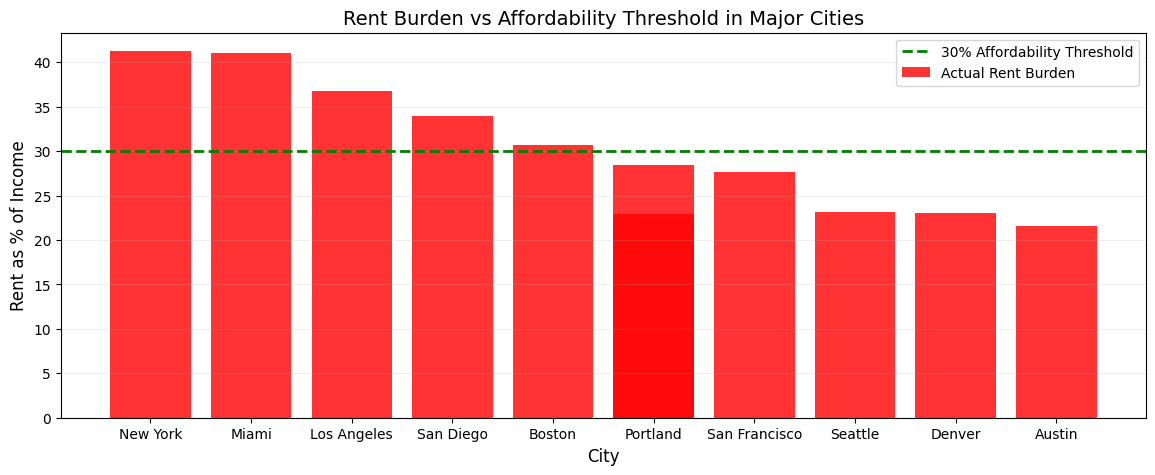

In [ ]:
# Popular cities comparison
pop_cities = ['San Francisco', 'Los Angeles', 'New York', 'Boston', 'San Diego',
                      'Miami', 'Seattle', 'Portland', 'Austin', 'Denver']
df_visualization = df[df['CityName'].isin(pop_cities)].sort_values('Average Affordability', ascending=False)

# Rent burden vs 30% threshold
plt.figure(figsize=(14, 5))
plt.bar(
    df_visualization['CityName'],
    df_visualization['Average Affordability'] * 100,
    color='red',
    alpha=0.8,
    label='Actual Rent Burden'
    )

plt.axhline(y=30, color='green', linestyle='--', linewidth=2, label='30% Affordability Threshold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Rent as % of Income', fontsize=12)
plt.title('Rent Burden vs Affordability Threshold in Major Cities', fontsize=14)
plt.grid(axis='y', alpha=0.2)
plt.legend()
plt.show()

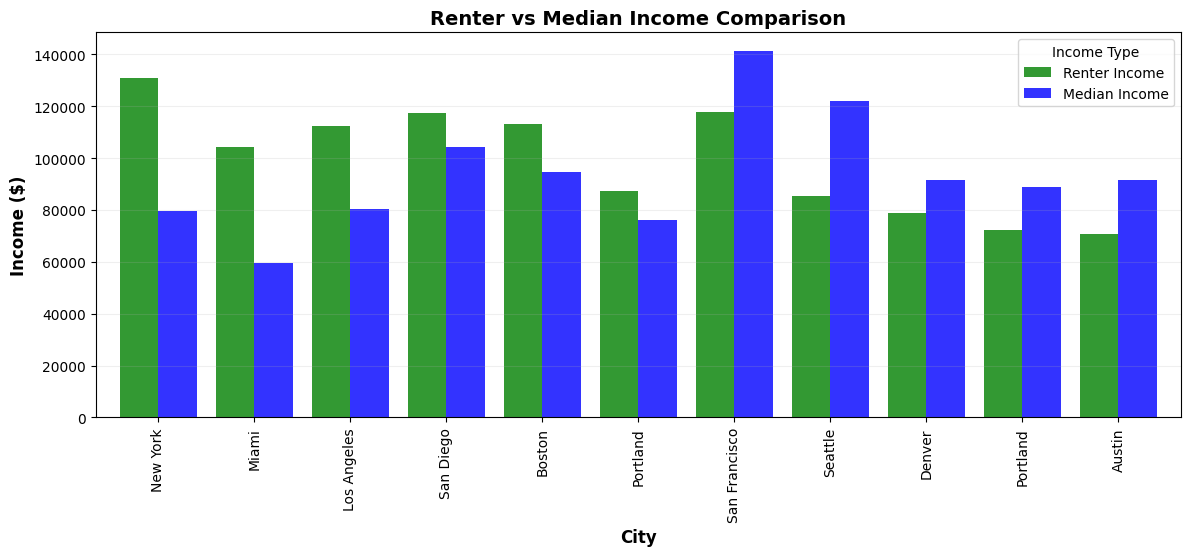

In [ ]:
# Income comparison
df_visualization.set_index('CityName')[['Renter Income', 'Median Income']].plot(
    kind='bar',
    figsize=(14, 5),
    alpha=0.8,
    color=['green', 'blue'],
    width=0.8
    )

plt.xlabel('City', fontsize=12, fontweight='bold')
plt.ylabel('Income ($)', fontsize=12, fontweight='bold')
plt.title('Renter vs Median Income Comparison', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.2)
plt.legend(title='Income Type', labels=['Renter Income', 'Median Income'])
plt.show();

Based on the two graphs, people spend more than 30% of their income on rent primarily because renters earn significantly less than the median income in expensive cities, yet face the same high rental costs. For example, in New York and Miami, renters earn around 130k and 105k while median incomes are only 80k and 60k respectively. Additionally, high-demand cities with strong job markets and limited housing supply leave renters with fewer alternatives, they must either pay the high rents or leave the city entirely. Ultimately, people accept these rent burdens because the economic opportunities and lifestyle benefits of living in major cities outweigh the financial strain of spending 40% or more of their income on housing.

# Question 2: What key factors influence rent change?

To do so we will analyze potential correlations between our factors such as population, property tax, minimum wage, etc., and rent affordability.

In [ ]:
numerical_cols = ['Average Affordability', 'Population', 'Minimum Wage', 'Renter Income','State property tax', 'Median Income']
correlation_matrix = df[numerical_cols].corr()

print("Correlation with Average Affordability:")
affordability_corr = correlation_matrix['Average Affordability'].drop('Average Affordability').sort_values(ascending=False)

for col, corr in affordability_corr.items():
    strength = "Strong" if abs(corr) > 0.5 else ("Moderate" if abs(corr) > 0.3 else "Weak")
    direction = "And Positive" if corr > 0 else "And Negative"
    print(f"{col}: {corr:.3f} ({strength} {direction})")

Correlation with Average Affordability:
Renter Income: 0.758 (Strong And Positive)
Minimum Wage: 0.333 (Moderate And Positive)
Median Income: 0.291 (Weak And Positive)
Population: 0.215 (Weak And Positive)
State property tax: -0.327 (Moderate And Negative)


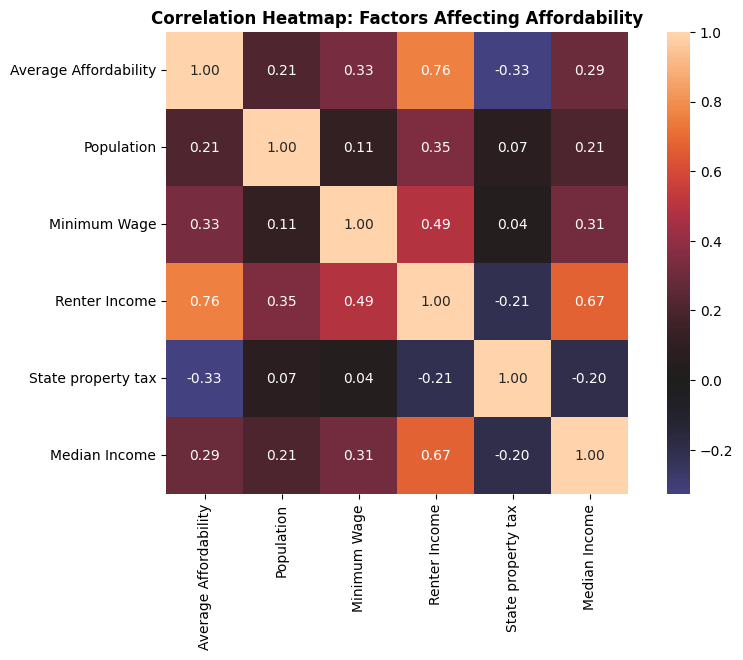

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    center=0,
    square=True
    )
plt.title('Correlation Heatmap: Factors Affecting Affordability', fontsize=12, fontweight='bold')
plt.show()

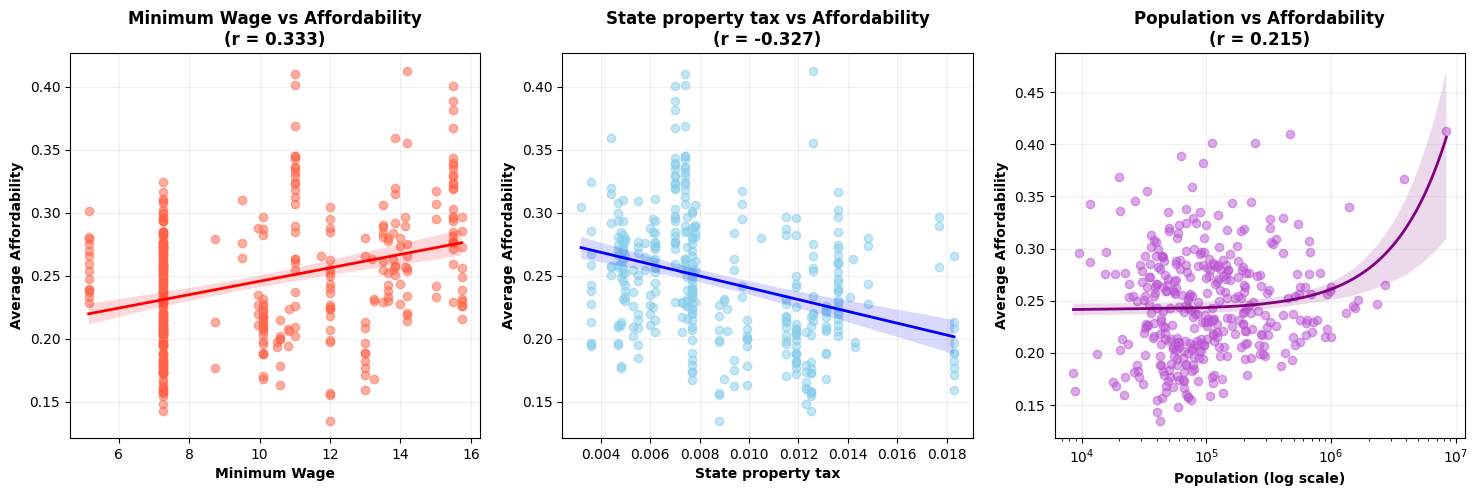

In [ ]:
# All correlation scatter plots in one figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

scatter_configs = [
    ('Minimum Wage', 'tomato', 'red', False),
    ('State property tax', 'skyblue', 'blue', False),
    ('Population', 'mediumorchid', 'purple', True)
]

for ax, (x_col, color, line_color, log_scale) in zip(axes, scatter_configs):
    corr_val = correlation_matrix.loc[x_col, "Average Affordability"]

    sns.regplot(
        data=df,
        x=x_col,
        y='Average Affordability',
        scatter_kws={'alpha': 0.5, 'color': color},
        line_kws={'color': line_color, 'linewidth': 2},
        ax=ax
        )

    if log_scale:
        ax.set_xscale('log')
        x_label = f'{x_col} (log scale)'
    else:
        x_label = x_col

    ax.set_xlabel(x_label, fontweight='bold')
    ax.set_ylabel('Average Affordability', fontweight='bold')
    ax.set_title(f'{x_col} vs Affordability\n(r = {corr_val:.3f})', fontweight='bold')
    ax.grid(alpha=0.2)

plt.show()

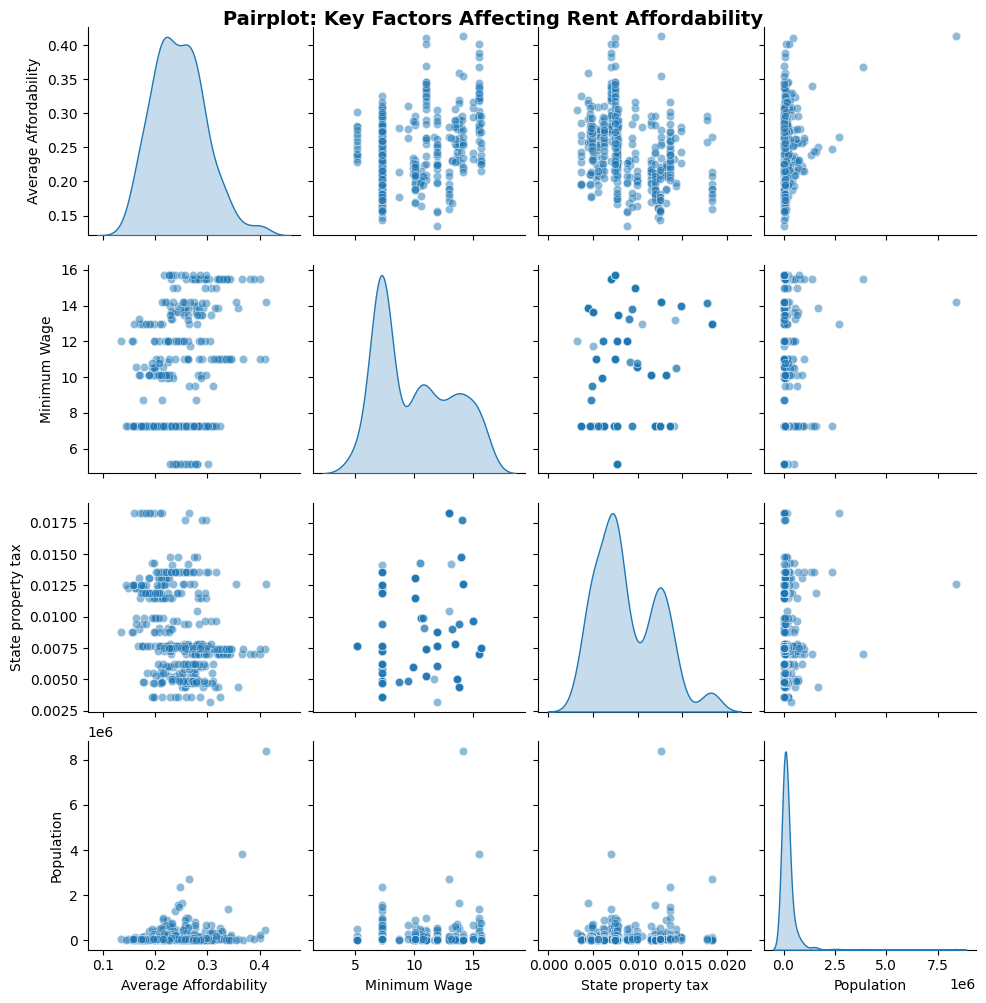

In [ ]:
# Rent Affordability Pairplot
key_factors = ['Average Affordability', 'Minimum Wage', 'State property tax', 'Population']
pairplot = sns.pairplot(
    df[key_factors],
    diag_kind='kde',
    plot_kws={'alpha': 0.5},
    corner=False,
    height=2.5
    )

pairplot.fig.suptitle('Pairplot: Key Factors Affecting Rent Affordability', y=1.0, fontsize=14, fontweight='bold')
plt.show()

Based on those three visuals, we can say that rent affordability is strongly influenced by renter income, with a high positive correlation of 0.76. This means that areas where renters earn more tend to have better affordability.

Minimum wage also plays a moderate positive role (correlation of 0.33), meaning higher minimum wages are associated with slightly better affordability, likely because they boost incomes for lower-earning renters.

Interestingly, state property taxes show a negative correlation of -0.33, suggesting that higher property taxes may actually worsen affordability as landlords pass those costs onto renters.

Population size has minimal impact (correlation of 0.21), indicating that city size matters less than the income levels of people living there.

Overall, the data shows that areas with higher renter incomes have the strongest potential to improve rent affordability.

# Question 3: Are rent increases consistent across state or concentrated in cities?

In [ ]:
# State & city analysis
state_stats = df.groupby('StateName').agg({
    'Average Affordability': ['mean', 'std', 'min', 'max'],
    'CityName': 'count'
}).round(4)

state_stats.columns = ['Mean Affordability', 'Std Dev', 'Min', 'Max', 'Cities']
state_stats = state_stats.sort_values('Std Dev', ascending=False)

print("States with Highest Variation in Rent Burden:")
# High standard deviation = inconsistent across cities
print(state_stats.head(15))

print("\nStates with Most Consistent Rent Burden:")
# Low standard deviation = consistent across cities
print(state_stats.tail(15))

States with Highest Variation in Rent Burden:
               Mean Affordability  Std Dev     Min     Max  Cities
StateName                                                         
New York                   0.2705   0.0646  0.2138  0.4126      10
West Virginia              0.2229   0.0519  0.1766  0.2789       3
Idaho                      0.2364   0.0419  0.1782  0.2848       5
California                 0.3146   0.0415  0.2294  0.4008      26
Alabama                    0.2405   0.0414  0.1944  0.3245      11
Florida                    0.3245   0.0408  0.2601  0.4103      20
Arizona                    0.2930   0.0406  0.2508  0.3588       7
Louisiana                  0.2484   0.0388  0.1845  0.3090       9
Massachusetts              0.2788   0.0386  0.2330  0.3169       5
Indiana                    0.2088   0.0384  0.1674  0.2994      12
Michigan                   0.2235   0.0371  0.1703  0.2965      15
Pennsylvania               0.2125   0.0365  0.1723  0.2954      18
Maryland        

## Interactive Plot: US Map of Average Rent Affordability (2023)

In [ ]:
init_notebook_mode(connected=True)

# Aggregate to state level (if not already done above)
state_afford = (
    df.groupby(["abb_StateName", "StateName"])["Average Affordability"]
      .mean()
      .reset_index()
)

# Make a temporary copy just for plotting
plot_df = state_afford.copy()
plot_df["AffordPercent"] = plot_df["Average Affordability"] * 100

fig = px.choropleth(
    plot_df,
    locations="abb_StateName",
    locationmode="USA-states",
    color="AffordPercent",
    hover_name="StateName",
    hover_data={"AffordPercent": ':.1f', "abb_StateName": False},
    scope="usa",
    color_continuous_scale="RdYlGn_r",
    labels={"AffordPercent": "Avg Rent (% of Income)"},
    title="Average Rent Affordability by State (2023)"
)

fig.update_layout(
    margin=dict(l=10, r=10, t=40, b=10)
)

fig.show(renderer="colab")

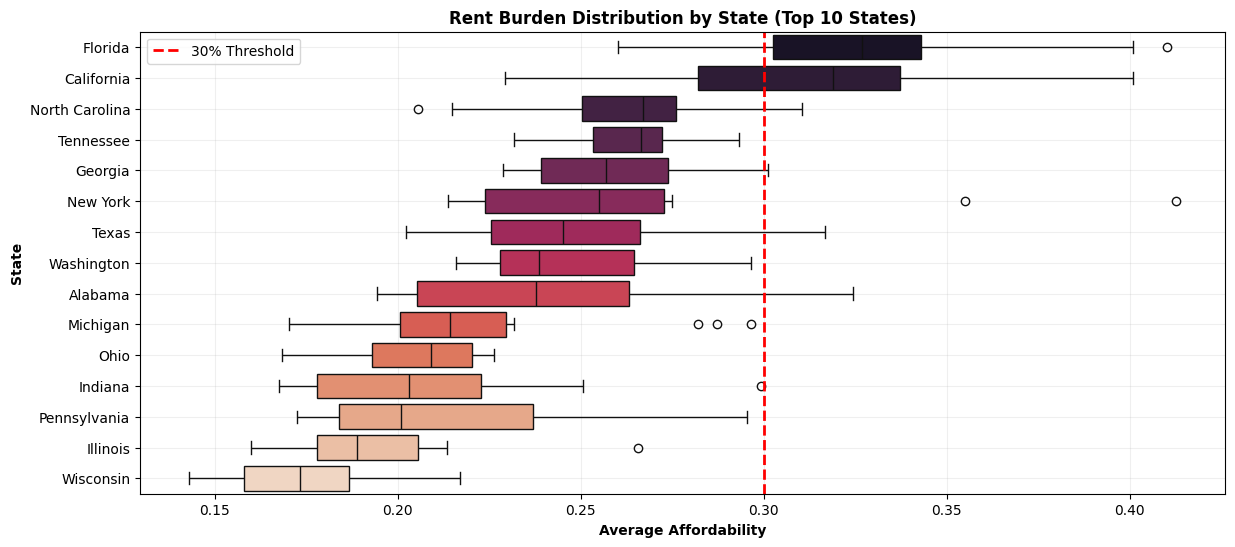

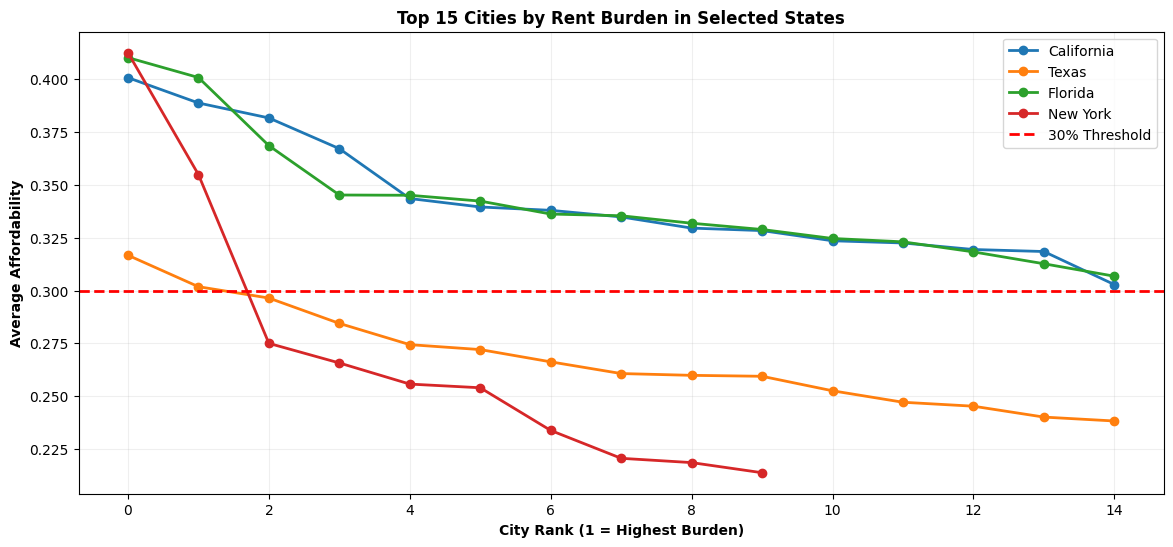

In [ ]:
top_states = df.groupby('StateName')['CityName'].count().nlargest(15).index
df_top_states = df[df['StateName'].isin(top_states)]

# Box plot by state
plt.figure(figsize=(14, 6))
state_order = df_top_states.groupby('StateName')['Average Affordability'].median().sort_values(ascending=False).index
sns.boxplot(
    data=df_top_states,
    y='StateName',
    x='Average Affordability',
    order=state_order,
    palette='rocket'
    )

plt.axvline(x=0.30, color='red', linestyle='--', linewidth=2, label='30% Threshold')
plt.xlabel('Average Affordability', fontweight='bold')
plt.ylabel('State', fontweight='bold')
plt.title('Rent Burden Distribution by State (Top 10 States)', fontsize=12, fontweight='bold')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

# City rankings line plot
plt.figure(figsize=(14, 6))
selected_states = ['California', 'Texas', 'Florida', 'New York']
for state in selected_states:
    state_data = df[df['StateName'] == state].sort_values('Average Affordability', ascending=False).head(15)
    plt.plot(
        range(len(state_data)),
        state_data['Average Affordability'],
        marker='o',
        markersize=6,
        label=state,
        linewidth=2
        )

plt.axhline(y=0.30, color='red', linestyle='--', linewidth=2, label='30% Threshold')
plt.ylabel('Average Affordability', fontweight='bold')
plt.xlabel('City Rank (1 = Highest Burden)', fontweight='bold')
plt.title('Top 15 Cities by Rent Burden in Selected States', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

Based on the two graphs, rent burdens are heavily concentrated in specific cities rather than being consistent across the entire states

The second graph shows dramatic variation within certain states. For example, Florida's most expensive city has a rent burden over 40%, but this drops sharply to around 30% by the 15th-ranked city. Similarly, New York starts at 40% rent burden in its priciest city but falls to about 21% by the middle-ranked cities. California and Texas show the same pattern of steep declines from their most expensive cities to more affordable areas within the same state.

The first graph reinforces this by showing wide distributions within states like Florida, California, and New York, with outlier dots indicating extreme cases. This data clearly demonstrates that high rent burdens are a city-specific problem driven by local housing markets, not a uniform issue across the entire state. Living in smaller cities or rural areas within the same state can result in significantly better affordability.

# Question 4: Why is the required income for affordable housing in some cities higher than the median income, and what are the consequences?

In other words, required income vs median income.

In [ ]:
df['required_income_30pct'] = df['Renter Income'] * df['Average Affordability'] / 0.30
df['has_income_gap'] = df['Income Gap'] > 0

problem_cities = df[df['has_income_gap']].sort_values('Income Gap', ascending=False)
print(f"Number of cities where required income > median income: {len(problem_cities)}")
print(f"\nTop 15 Cities with Largest Income Gaps:")

# Create and display formatted table
top_15 = problem_cities.head(15)[['CityName', 'StateName', 'required_income_30pct', 'Median Income', 'Income Gap']].copy()
top_15['Gap %'] = (top_15['Income Gap'] / top_15['Median Income'] * 100).round(1)
top_15.columns = ['City', 'State', 'Required Income', 'Median Income', 'Income Gap', 'Gap %']

display(top_15.style.format({
    'Required Income': '${:,.0f}',
    'Median Income': '${:,.0f}',
    'Income Gap': '${:,.0f}',
    'Gap %': '{:.1f}%'
}))

Number of cities where required income > median income: 84

Top 15 Cities with Largest Income Gaps:


,City,State,Required Income,Median Income,Income Gap,Gap %
221,New York,New York,"$180,105","$79,713","$100,392",125.9%
65,Miami,Florida,"$142,625","$59,390","$83,235",140.1%
40,Santa Maria,California,"$162,767","$84,617","$78,150",92.4%
44,Santa Cruz,California,"$177,412","$111,427","$65,985",59.2%
26,Los Angeles,California,"$137,745","$80,366","$57,379",71.4%
213,Trenton,New Jersey,"$93,956","$47,102","$46,854",99.5%
42,San Luis Obispo,California,"$112,980","$66,711","$46,269",69.4%
231,Ithaca,New York,"$94,115","$48,617","$45,498",93.6%
75,Port St. Lucie,Florida,"$121,973","$78,137","$43,836",56.1%
60,Bridgeport,Connecticut,"$96,683","$56,584","$40,099",70.9%


### Consequences of Income Gap:
- Economic Strain: Many households are forced to spend over 30% to rent, limiting spending on:
   - Healthcare, education, savings, and emergencies
- Housing Instability: Higher risk of eviction and homelessness
- Economic Inequality: Low income workers are priced out of job-rich areas
- Reduced Mobility: Difficulty living near workplaces
- Wealth Gap: Much harder to save for ownership and even retirement

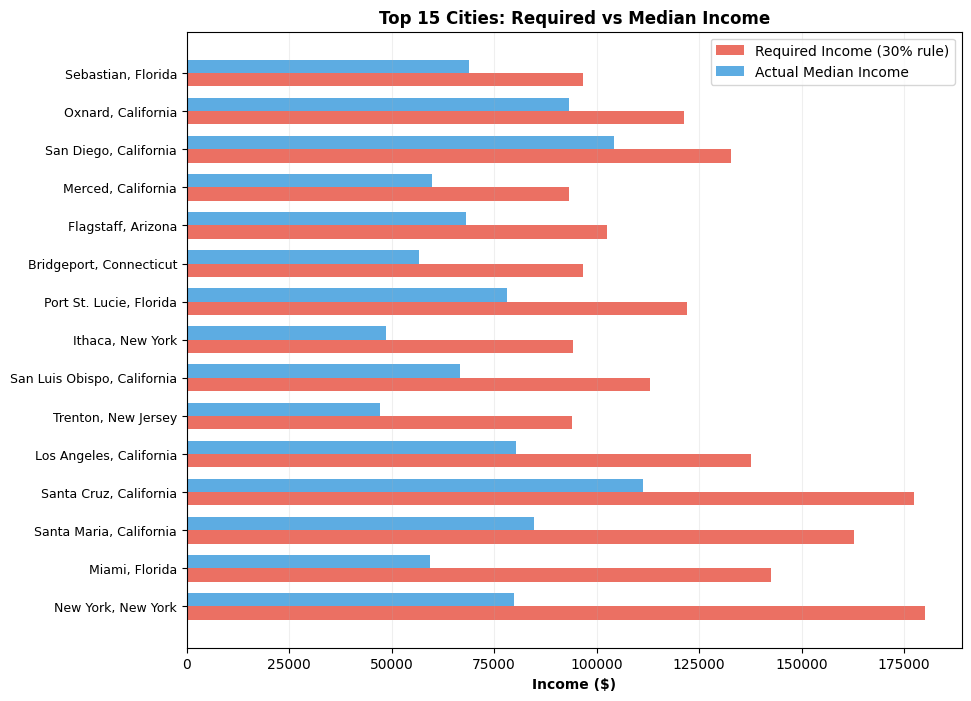

In [ ]:
# Top 15 Cities: Required vs Median Income
top_problem = problem_cities.head(15)

# Prepare data in long format
income_comparison = pd.DataFrame({
    'City': top_problem['CityName'] + ', ' + top_problem['StateName'],
    'Required Income (30% rule)': top_problem['required_income_30pct'].values,
    'Actual Median Income': top_problem['Median Income'].values
})

plt.figure(figsize=(10, 8))
y_pos = np.arange(len(income_comparison))
width = 0.35

plt.barh(y_pos - width/2, income_comparison['Required Income (30% rule)'],
         width, label='Required Income (30% rule)', color='#e74c3c', alpha=0.8)
plt.barh(y_pos + width/2, income_comparison['Actual Median Income'],
         width, label='Actual Median Income', color='#3498db', alpha=0.8)

plt.yticks(y_pos, income_comparison['City'], fontsize=9)
plt.xlabel('Income ($)', fontweight='bold')
plt.title('Top 15 Cities: Required vs Median Income', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.2)
plt.legend()
plt.show()

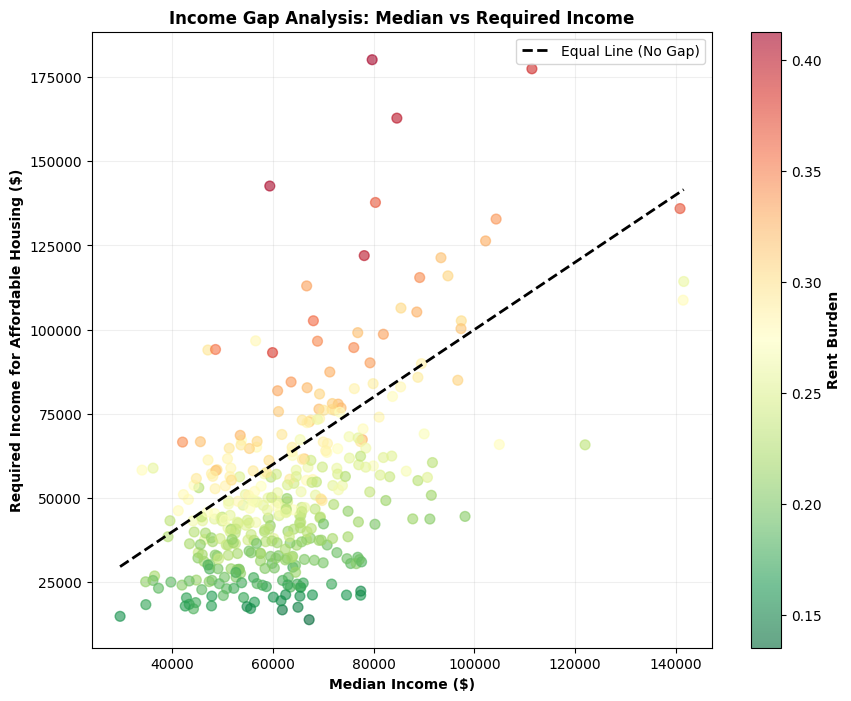

In [ ]:
# Income Gap Analysis: Median vs Required Income
plt.figure(figsize=(10, 8))

scatter = plt.scatter(df['Median Income'], df['required_income_30pct'],
                     c=df['Average Affordability'], cmap='RdYlGn_r',
                     alpha=0.6, s=50)

# Diagonal "no gap" line
min_income = df['Median Income'].min()
max_income = df['Median Income'].max()
plt.plot([min_income, max_income], [min_income, max_income],
         'k--', linewidth=2, label='Equal Line (No Gap)')

plt.xlabel('Median Income ($)', fontweight='bold')
plt.ylabel('Required Income for Affordable Housing ($)', fontweight='bold')
plt.title('Income Gap Analysis: Median vs Required Income', fontsize=12, fontweight='bold')
plt.grid(alpha=0.2)
plt.legend()
cbar = plt.colorbar(scatter)
cbar.set_label('Rent Burden', fontweight='bold')
plt.show()

# Question 5: How can data-driven insights help improve financial decision-making and housing policy?

In [ ]:
# Best cities for affordability
best_cities = df[df['Average Affordability'] < 0.25].nlargest(10, 'Population')
print("Most Affordable Big Cities (Rent <25% of income):\n")
for index, row in best_cities.iterrows():
    print(f" - {row['CityName']}, {row['StateName']}: {row['Average Affordability']*100:.1f}% Burden, Population: {row['Population']:,.0f}")

# States needing most help
help_needed = state_stats.nlargest(5, 'Mean Affordability')
print("\nStates Requiring Urgent Policy Help:\n")
for state, row in help_needed.iterrows():
    print(f" - {state}: {row['Mean Affordability']*100:.1f}% verage burden across {int(row['Cities'])} cities")

# High demand markets for investment
high_demand = df[df['Average Affordability'] > 0.30].nlargest(10, 'Population')
print("\nHigh Demand Markets:\n")
for index, row in high_demand.head(5).iterrows():
    print(f" - {row['CityName']}, {row['StateName']}: {row['Average Affordability']*100:.1f}% burden")

Most Affordable Big Cities (Rent <25% of income):

 - Houston, Texas: 24.7% Burden, Population: 2,346,908
 - Philadelphia, Pennsylvania: 24.3% Burden, Population: 1,563,349
 - San Antonio, Texas: 24.5% Burden, Population: 1,502,711
 - Dallas, Texas: 23.8% Burden, Population: 1,317,163
 - Austin, Texas: 21.6% Burden, Population: 989,583
 - Columbus, Ohio: 22.3% Burden, Population: 920,569
 - Indianapolis, Indiana: 21.5% Burden, Population: 885,839
 - Seattle, Washington: 23.1% Burden, Population: 764,182
 - Denver, Colorado: 23.0% Burden, Population: 721,367
 - Oklahoma City, Oklahoma: 22.0% Burden, Population: 704,567

States Requiring Urgent Policy Help:

 - Florida: 32.5% verage burden across 20 cities
 - California: 31.5% verage burden across 26 cities
 - Hawaii: 30.5% verage burden across 1 cities
 - Arizona: 29.3% verage burden across 7 cities
 - Nevada: 28.3% verage burden across 3 cities

High Demand Markets:

 - New York, New York: 41.3% burden
 - Los Angeles, California: 36.7%

# Actionable Insights from Income Gap Analysis

**1. Individual Financial Decisions**  
- Location: Cities with rent <30% of income  
- Career: Cities where median income > required income  
- Budget: Use 30% rule for housing  

**2. Housing Policy Recommendations**  
- Increase housing supply, zoning reform, rent stabilization, affordable housing incentives, rental assistance  

**3. Employer Location Strategies**  
- Adjust salaries for local rent burden, offer remote work, consider relocating offices  

**4. Investment Insights**  
- Focus on high-demand, supply-constrained markets  
- Target cities with >30% rent burden and large populations


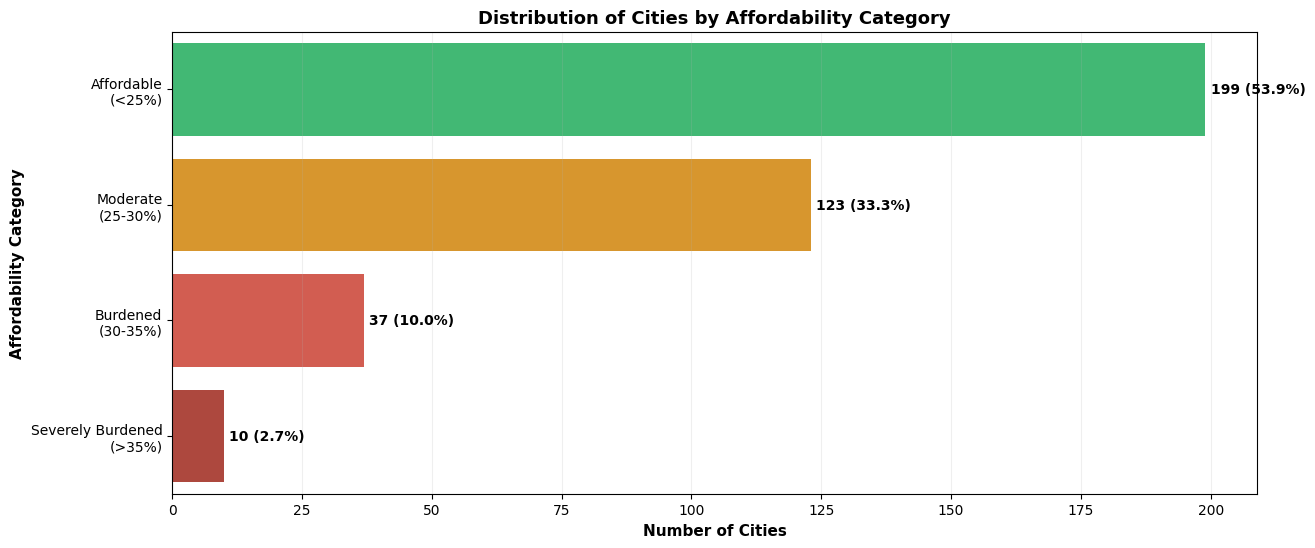

In [ ]:
bins = [0, 0.25, 0.30, 0.35, 1.0]
categories = ['Affordable\n(<25%)', 'Moderate\n(25-30%)', 'Burdened\n(30-35%)', 'Severely Burdened\n(>35%)']
df['affordability_category'] = pd.cut(df['Average Affordability'], bins=bins, labels=categories, right=False)

category_counts = df['affordability_category'].value_counts().sort_index().reset_index()
category_counts.columns = ['Category', 'Count']

# Horizontal bar chart
plt.figure(figsize=(14, 6))
barplot = sns.barplot(
    data=category_counts,
    y='Category',
    x='Count',
    palette=['#2ecc71', '#f39c12', '#e74c3c', '#c0392b']
)

# Add count and percentage labels
for index, row in category_counts.iterrows():
    barplot.text(
        row['Count'] + 1, index, f"{row['Count']} ({row['Count']/len(df)*100:.1f}%)",
        va='center',
        fontweight='bold'
    )

plt.xlabel('Number of Cities', fontweight='bold', fontsize=11)
plt.ylabel('Affordability Category', fontweight='bold', fontsize=11)
plt.title('Distribution of Cities by Affordability Category', fontweight='bold', fontsize=13)
plt.grid(axis='x', alpha=0.2)
plt.show()

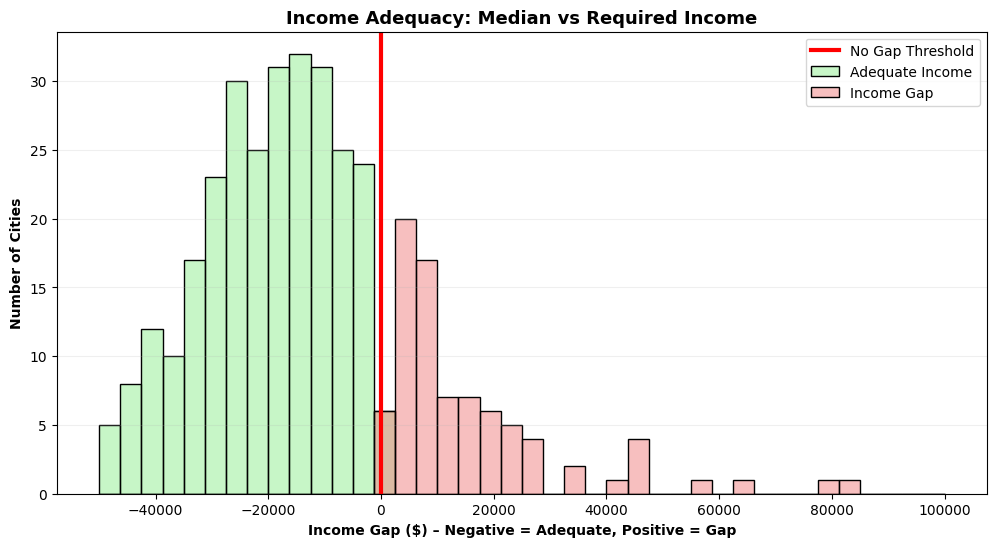

In [ ]:
plt.figure(figsize=(12, 6))

# Separate gaps
adequate = df[df['Income Gap'] < 0]['Income Gap']
shortfall = df[df['Income Gap'] >= 0]['Income Gap']

# Adequate Income
sns.histplot(adequate, bins=40, binrange=(-50000, 100000),
             color='lightgreen', edgecolor='black', alpha=0.5, label='Adequate Income')

# Income Gap
sns.histplot(shortfall, bins=40, binrange=(-50000, 100000),
             color='lightcoral', edgecolor='black', alpha=0.5, label='Income Gap')

# Zero-gap reference line
plt.axvline(0, color='red', linewidth=3, label='No Gap Threshold')

plt.xlabel('Income Gap ($) – Negative = Adequate, Positive = Gap', fontweight='bold')
plt.ylabel('Number of Cities', fontweight='bold')
plt.title('Income Adequacy: Median vs Required Income', fontweight='bold', fontsize=13)
plt.grid(axis='y', alpha=0.2)
plt.legend()
plt.show()


# SUMMARY

## Dataset Overview
- Total Cities Analyzed: 369  
- States Covered: 50  
- Average Rent Burden: 24.6%  

## Affordability Crisis (Question 1)
- 12.7% of cities exceed 30% rent burden threshold  
- Average rent burden in affected cities: 33.5%  
- Primary cause: Stagnant wages + Rising housing costs  

## Key Influencing Factors (Question 2)
- Strongest Positive Correlation: Minimum Wage (r = 0.333)  
- Strongest Negative Correlation: State Property Tax (r = -0.327)  
- Population has moderate positive correlation (r = 0.215)  

## Geographic Consistency (Question 3)
- High variation within states indicates city-specific issues  
- States with highest variation: New York, West Virginia, Idaho  
- Rent burden is not consistent across states; concentrated in specific metros  

## Income Gap Consequences (Question 4)
- 84 cities (22.8%) have required income > median income  
- Average gap in affected cities: $17,337  
- Consequences: Housing instability, wealth inequality, reduced economic mobility  

## Insight-based Policy Recommendations (Question 5)
- Immediate intervention needed in 5 states  
- Supply-side solutions: zoning reform, development incentives  
- Demand-side protections: rent assistance, stabilization measures  
- Employer adjustments: location-based wage considerations  
- Investment opportunities: high-demand, supply-constrained markets  
